In [1]:
import argparse
import uproot
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import awkward as ak
from pathlib import Path
import pickle

from uncertainties import ufloat, unumpy
#import atlas_mpl_style as ampl
#ampl.use_atlas_style(usetex=False)


def Read_Pickle(path):
    with open(path, 'rb') as f:
        data = pickle.load(f)
        
    return data 

In [3]:
#mcfile_path = "/eos/user/w/wasu/conda/NewCodes/Results_trk_Dec11/nominal/dijet_pythia_all.root"
#mcfile_path2 = "/eos/user/w/wasu/conda/NewCodes/Results_trk_Dec11/syst_ntrk_fake/dijet_pythia_all.root" #syst_ntrk_fake/eff
#mcfile = uproot.open(mcfile_path)["ntrk_Reweighting_Quark_Factor"]
#mcfile2 = uproot.open(mcfile_path2)["ntrk_Reweighting_Quark_Factor"]

var = "GBDT_newScore"#"jet_nTracks"#"jet_trackBDT","GBDT_newScore"]

nominal_SF_path = Path(f"./output/nominal/ADE/SFs_pkls/{var}_Reweighting_Quark_Factor/{var}/SFs.pkl")
nominal_SF = Read_Pickle(nominal_SF_path)


In [4]:
pt = 500
label_pt = ["LeadingJet", "SubLeadingJet"]
label_eta = ["Forward", "Central"]
label_type = ["Gluon", "Quark", "B_Quark", "C_Quark"]

In [7]:
HistMap = {}
HistMap2 = {}
HistMap_unumpy = {}
for i, l_pt  in enumerate(label_pt):
    for j, l_eta in enumerate(label_eta):
        for k, l_type in enumerate(label_type):
            #key = str(pt) + "_" + l_pt + "_" + l_eta + "_" + l_type + "_" + var
            #HistMap[key] = mcfile[key].to_numpy()
            #HistMap2[key] = mcfile2[key].to_numpy()
            key = f"{l_pt}_{l_type}_{l_eta}_{var}"
            HistMap_unumpy[key] = unumpy.uarray(nominal_SF[key].values(), np.sqrt(hists[label_reweight][key].variances()))
            



NameError: name 'hists' is not defined

In [ ]:
HistMap_unumpy.keys()

In [130]:
## Construct data-like MC 
Forward = np.zeros((60))
Central = np.zeros((60))
for k, v in HistMap.items():
    if k.__contains__('Forward'):
        Forward += v[0]
    elif k.__contains__('Central'):
        Central += v[0]
        
Forward2 = np.zeros((60))
Central2 = np.zeros((60))
for k, v in HistMap2.items():
    if k.__contains__('Forward'):
        Forward2 += v[0]
    elif k.__contains__('Central'):
        Central2 += v[0]

In [131]:
## Construct pure Quark vs Gluon 
Quark = np.zeros((60))
Gluon = np.zeros((60))
for k, v in HistMap.items():
    if k.__contains__('Quark'):
        Quark += v[0]
    elif k.__contains__('Gluon'):
        Gluon += v[0]
        
        
        
Quark2 = np.zeros((60))
Gluon2 = np.zeros((60))
for k, v in HistMap2.items():
    if k.__contains__('Quark'):
        Quark2 += v[0]
    elif k.__contains__('Gluon'):
        Gluon2 += v[0]

In [132]:
Forward_Quark = np.zeros((60))
Forward_Gluon = np.zeros((60))
Central_Quark = np.zeros((60))
Central_Gluon = np.zeros((60))

for k, v in HistMap.items():
    if k.__contains__('Quark') and k.__contains__('Forward'):
        Forward_Quark += v[0]
    elif k.__contains__('Gluon') and k.__contains__('Forward'):
        Forward_Gluon += v[0]
    elif k.__contains__('Quark') and k.__contains__('Central'):
        Central_Quark += v[0]
    elif k.__contains__('Gluon') and k.__contains__('Central'):
        Central_Gluon += v[0]
        
        
Forward_Quark2 = np.zeros((60))
Forward_Gluon2 = np.zeros((60))
Central_Quark2 = np.zeros((60))
Central_Gluon2 = np.zeros((60))

for k, v in HistMap2.items():
    if k.__contains__('Quark') and k.__contains__('Forward'):
        Forward_Quark2 += v[0]
    elif k.__contains__('Gluon') and k.__contains__('Forward'):
        Forward_Gluon2 += v[0]
    elif k.__contains__('Quark') and k.__contains__('Central'):
        Central_Quark2 += v[0]
    elif k.__contains__('Gluon') and k.__contains__('Central'):
        Central_Gluon2 += v[0]

In [133]:
frac_Forward_Quark = np.sum(Forward_Quark) / np.sum(Forward)
frac_Central_Quark = np.sum(Central_Quark) / np.sum(Central)

frac_Forward_Gluon = 1 - frac_Forward_Quark
frac_Central_Gluon = 1 - frac_Central_Quark



frac_Forward_Quark2 = np.sum(Forward_Quark2) / np.sum(Forward2)
frac_Central_Quark2 = np.sum(Central_Quark2) / np.sum(Central2)

frac_Forward_Gluon2 = 1 - frac_Forward_Quark2
frac_Central_Gluon2 = 1 - frac_Central_Quark2

In [134]:
f = np.array([[frac_Forward_Quark,  frac_Forward_Gluon], [frac_Central_Quark, frac_Central_Gluon]])
f_inv = np.linalg.inv(f)

f2 = np.array([[frac_Forward_Quark2,  frac_Forward_Gluon2], [frac_Central_Quark2, frac_Central_Gluon2]])
f_inv2 = np.linalg.inv(f2)

In [135]:
# normalize 
p_Q = Quark / np.sum(Quark)
p_G = Gluon / np.sum(Gluon)

p_H = Forward / np.sum(Forward)
p_L = Central / np.sum(Central)

p_H_Q = Forward_Quark / np.sum(Forward_Quark)
p_L_Q = Central_Quark / np.sum(Central_Quark)
p_H_G = Forward_Gluon / np.sum(Forward_Gluon)
p_L_G = Central_Gluon / np.sum(Central_Gluon)


extract_p_Q = f_inv[0][0] * p_H + f_inv[0][1]* p_L 
extract_p_G = f_inv[1][0] * p_H + f_inv[1][1]* p_L 


####
p_Q2 = Quark2 / np.sum(Quark2)
p_G2 = Gluon2 / np.sum(Gluon2)

p_H2 = Forward2 / np.sum(Forward2)
p_L2 = Central2 / np.sum(Central2)

p_H_Q2 = Forward_Quark2 / np.sum(Forward_Quark2)
p_L_Q2 = Central_Quark2 / np.sum(Central_Quark2)
p_H_G2 = Forward_Gluon2 / np.sum(Forward_Gluon2)
p_L_G2 = Central_Gluon2 / np.sum(Central_Gluon2)


extract_p_Q2 = f_inv2[0][0] * p_H2 + f_inv2[0][1]* p_L2
extract_p_G2 = f_inv2[1][0] * p_H2 + f_inv2[1][1]* p_L2 


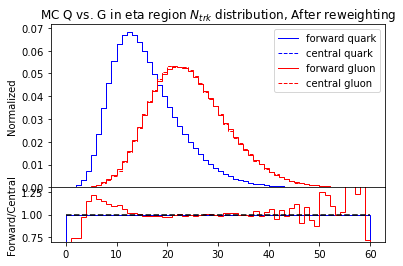

In [136]:
bin_edges = np.linspace(0,60,61)
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [3, 1], 'hspace': 0})

ax0.stairs(values = p_H_Q, edges = bin_edges, color = 'blue', label = 'forward quark')
ax0.stairs(values = p_L_Q, edges = bin_edges,  color = 'blue', linestyle='--', label = 'central quark' )

ax0.stairs(values = p_H_G, edges = bin_edges, color = 'red', label = 'forward gluon')
ax0.stairs(values = p_L_G, edges = bin_edges, color = 'red', linestyle='--', label = 'central gluon' )

ax0.set_ylabel("Normalized")
ax0.legend()
ax0.set_title(r"MC Q vs. G in eta region $N_{trk}$ distribution, After reweighting")

ax1.stairs(values = p_H_Q/p_L_Q, edges = bin_edges, color = 'blue')
ax1.stairs(values = p_H_G/p_L_G, edges = bin_edges, color = 'red')
ax1.set_ylabel("Forward/Central")
ax1.set_ylim(0.7, 1.3)
ax1.hlines(y = 1, xmin = 0, xmax = 60, color = 'black', linestyle = '--')

ax1.plot()
plt.savefig("./compare_fake/MC_truth_Q_G_eta_ntrk_after_reweighting.jpg", dpi=300)
plt.show()

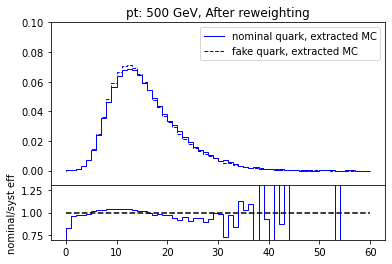

In [137]:
bin_edges = np.linspace(0,60,61)
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [3, 1], 'hspace': 0})
ax0.stairs(values = extract_p_Q, edges = bin_edges, color = 'blue', label = 'nominal quark, extracted MC')
ax0.stairs(values = extract_p_Q2, edges = bin_edges, color = 'blue',  linestyle='--',label = 'fake quark, extracted MC')

#ax0.stairs(values = p_Q, edges = bin_edges, color='blue', linestyle='--', label = 'quark, truth MC')
ax0.legend()
ax0.set_ylim(-0.01, 0.1)
ax0.set_title("pt: "+f"{pt}"+" GeV, After reweighting")

ax1.stairs(values = extract_p_Q2/extract_p_Q, edges=bin_edges, color = 'blue')
ax1.set_ylim(0.7,1.3)
ax1.set_ylabel("nominal/syst eff")
ax1.hlines(y = 1, xmin = 0, xmax = 60, color = 'black', linestyle = '--')
fig.savefig("./compare_fake/MCclosure_extracted_quark_ntrk"+f"{pt}"+".jpg", dpi=300)

fig.show()

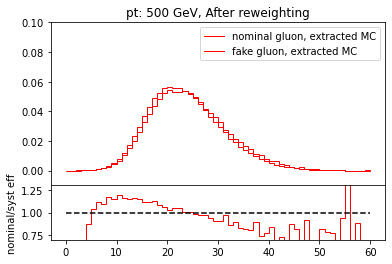

In [138]:
bin_edges = np.linspace(0,60,61)
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [3, 1], 'hspace': 0})
ax0.stairs(values = extract_p_G, edges = bin_edges, color = 'red', label = 'nominal gluon, extracted MC')
ax0.stairs(values = extract_p_G2, edges = bin_edges, color = 'red', label = 'fake gluon, extracted MC')

#ax0.stairs(values = p_G, edges = bin_edges, color='red', linestyle='--', label = 'quark, truth MC')
ax0.legend()
ax0.set_ylim(-0.01, 0.1)
ax0.set_title("pt: "+f"{pt}"+" GeV, After reweighting")

ax1.stairs(values = extract_p_G2/extract_p_G , edges=bin_edges, color = 'red')
ax1.set_ylim(0.7,1.3)
ax1.set_ylabel("nominal/syst eff")
ax1.hlines(y = 1, xmin = 0, xmax = 60, color = 'black', linestyle = '--')
fig.savefig("MCclosure_extracted_gluon_ntrk"+f"{pt}"+".jpg", dpi=300)

fig.show()